In [1]:
# visualize the data from training code
# x = input chunk
# and feat2d projected to 3d

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import trimesh
import torch
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [7]:
voxel_dims = (1, 1, 1)

In [21]:
data_path = '../2d.pth'
data = torch.load(data_path)
print(data.keys())
coords2d, proj2d3d = data['coords2d'], data['proj2d3d']
print(coords2d.shape, proj2d3d.shape)

dict_keys(['coords2d', 'proj2d3d'])
(2, 2190) (32, 32, 32)


In [22]:
data_path = '../x.pth'
data = torch.load(data_path)
print(data.keys())
x = data['x']
print(x.shape)

dict_keys(['x'])
(32, 32, 32)


(-0.5, 39.5, 29.5, -0.5)

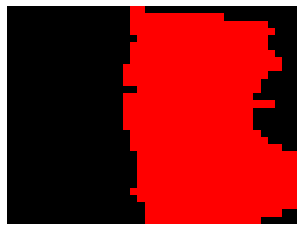

In [23]:
# 2d coords 
proj_img_size = (40, 30)
i, j = coords2d

# 40, 30 image, index with (i, j), then transpose to display
color_2d = np.zeros(proj_img_size + (3,), dtype=int)
color_2d[i, j] = (255, 0, 0)
plt.imshow(color_2d.transpose(1, 0, 2))
plt.axis('off')

In [24]:
scene = trimesh.scene.scene.Scene() 

occupied = 0
overlap = 0

print('Draw occupied voxels')
for i in tqdm(range(x.shape[0])):
    for j in range(x.shape[1]):
        for k in range(x.shape[2]):
            if x[i, j, k] == 1:
                occupied += 1
                if proj2d3d[i, j, k] == 1:
                    overlap += 1
                # transformation of this voxel
                t = torch.eye(4)
                t[:3, -1] = -torch.Tensor((i, j, k))

                voxel_transform = torch.inverse(torch.Tensor(t)).numpy()
                box = trimesh.creation.box(voxel_dims, voxel_transform)
                box.visual.face_colors = np.zeros((12, 4)) + (0, 0, 255, 128)
                box.visual.vertex_colors = np.zeros((8, 4)) + (0, 0, 255, 255)
                scene.add_geometry(box)

projected = 0
print('Draw projected voxels')
for i in tqdm(range(proj2d3d.shape[0])):
    for j in range(proj2d3d.shape[1]):
        for k in range(proj2d3d.shape[2]):
            if proj2d3d[i, j, k] == 1:
                projected += 1
                # transformation of this voxel
                t = torch.eye(4)
                t[:3, -1] = -torch.Tensor((i, j, k))

                voxel_transform = torch.inverse(torch.Tensor(t)).numpy()
                box = trimesh.creation.box(voxel_dims, voxel_transform)
                box.visual.face_colors = np.zeros((12, 4)) + (255, 0, 0, 128)
                box.visual.vertex_colors = np.zeros((8, 4)) + (255, 0, 0, 255)
                scene.add_geometry(box)

print(occupied, projected, overlap)
axes = trimesh.creation.axis(axis_radius=0.1, axis_length=10)
scene.add_geometry(axes)

scene.show()

  9%|▉         | 3/32 [00:00<00:01, 22.48it/s]

Draw occupied voxels


  9%|▉         | 3/32 [00:00<00:01, 20.51it/s]

Draw projected voxels


100%|██████████| 32/32 [00:01<00:00, 22.21it/s]


2650 2190 1258
